## Задание 1

Для набора данных "Спираль"
1. Попробуйте улучшить результат классификации за счет изменения следующих параметров: скорость обучения, количество эпох, виды оптимизаторов, количество нейронов, количество слоев. Результаты анализа представьте в виде графиков (диаграмм).
2. Добавьте слой (слои) Dropout (model.add(keras.layers.Dropout(0.5))), посмотрите, как изменится результат.
3. Добавьте слой нормализации (keras.layers.BatchNormalization) и оцените его влияние на качество обучения. Сделайте выводы.

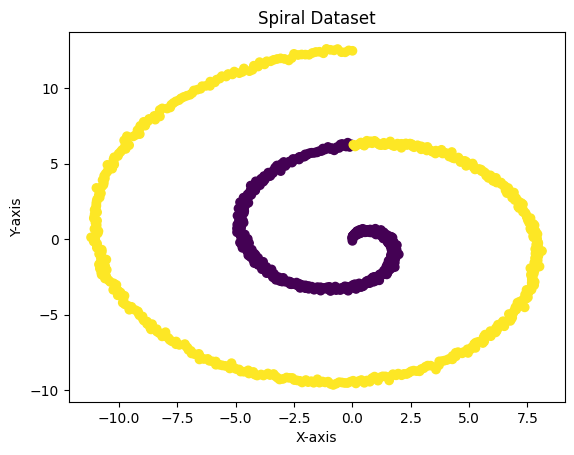

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация спирального набора данных
def make_spiral(n_samples=1000, noise=0.1):
    theta = np.linspace(0, 4 * np.pi, n_samples)  # Угол для спирали
    r = theta + np.random.randn(n_samples) * noise  # Радиус с добавлением шума
    x = r * np.sin(theta)  # Координата x
    y = r * np.cos(theta)  # Координата y
    return np.column_stack((x, y)), (theta > 2 * np.pi).astype(int)  # Возвращаем координаты и метки классов

# Создание спирального набора данных
X, y = make_spiral()
plt.scatter(X[:, 0], X[:, 1], c=y)  # Визуализация данных
plt.title('Spiral Dataset')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD

# Функция для создания модели многослойной нейронной сети
def create_model(learning_rate=0.001, neurons=32, layers=1, dropout_rate=0.0, use_batch_norm=False):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(2,)))  # Входной слой

    if use_batch_norm:  # Добавление слоя нормализации, если указано
        model.add(BatchNormalization())

    for _ in range(layers - 1):  # Добавление скрытых слоев
        model.add(Dense(neurons, activation='relu'))
        if use_batch_norm:  # Добавление слоя нормализации для каждого скрытого слоя
            model.add(BatchNormalization())

    if dropout_rate > 0:  # Добавление слоя Dropout, если указано
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))  # Выходной слой для бинарной классификации

    optimizer = Adam(learning_rate=learning_rate)  # Оптимизатор Adam с заданной скоростью обучения
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])  # Компиляция модели

    return model

In [ ]:
# Функция для обучения модели
def train_model(model, X, y, epochs=20, batch_size=32):
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)  # Обучение модели
    return history

In [ ]:
# Параметры для экспериментов
learning_rates = [0.001]  # Скорость обучения
neurons_list = [32]       # Количество нейронов в слое
layers_list = [2]         # Количество скрытых слоев
dropout_rates = [0.0]     # Уровень Dropout это список значений,
# которые определяют уровень регуляризации с использованием метода Dropout в нейронных сетях
batch_norm_options = [False]  # Использование Batch Normalization для улучшения их обучения и повышения стабильности

results = {}

# Цикл для перебора параметров и обучения модели
for lr in learning_rates:
    for neurons in neurons_list:
        for layers in layers_list:
            for dropout in dropout_rates:
                for batch_norm in batch_norm_options:
                    model = create_model(learning_rate=lr, neurons=neurons, layers=layers, dropout_rate=dropout, use_batch_norm=batch_norm)
                    history = train_model(model, X, y, epochs=100)  # Обучение модели
                    results[(lr, neurons, layers, dropout, batch_norm)] = history.history['accuracy']  # Сохранение результатов

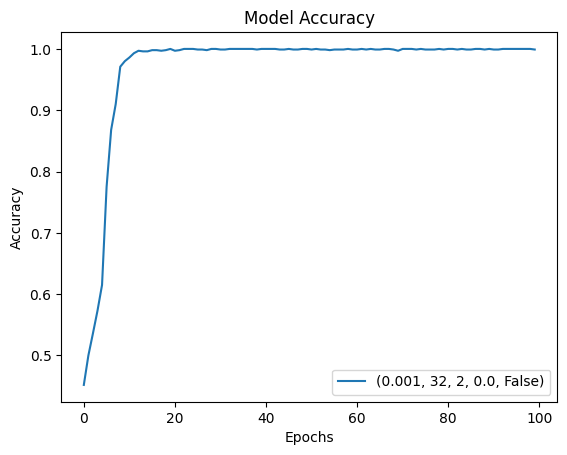

In [ ]:
# Визуализация результатов
for key, accuracy in results.items():
    plt.plot(accuracy, label=str(key))  # График точности для каждой комбинации параметров

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Задание 2
Для набора данных MNIST
1. Между двух слоев нейронной сети добавить слой Dropout
model.add(keras.layers.Dropout(0.5)), переобучить модель, оценить качество обучения.
Объяснить полученные результаты
2. Добавить еще один скрытый слой и проанализировать его влияние на качество обучения модели.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Загрузка набора данных MNIST
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.astype('float32') / 255.0  # Нормализация данных
X_test = X_test.astype('float32') / 255.0

# Преобразование данных
X_train = X_train.reshape((X_train.shape[0], 28 * 28))  # Изменение формы данных для подачи в модель
X_test = X_test.reshape((X_test.shape[0], 28 * 28))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Функция создания модели с Dropout
def create_model_with_dropout():
    model = keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))  # Первый скрытый слой
    model.add(layers.Dropout(0.5))  # Добавляем слой Dropout для предотвращения переобучения
    model.add(layers.Dense(64, activation='relu'))  # Второй скрытый слой
    model.add(layers.Dense(10, activation='softmax'))  # Выходной слой для многоклассовой классификации

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Компиляция модели
    return model

# Создание и обучение модели
model_with_dropout = create_model_with_dropout()
history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)  # Обучение модели

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7769 - loss: 0.7063 - val_accuracy: 0.9491 - val_loss: 0.1667
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9240 - loss: 0.2473 - val_accuracy: 0.9611 - val_loss: 0.1355
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9371 - loss: 0.2018 - val_accuracy: 0.9674 - val_loss: 0.1131
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9463 - loss: 0.1797 - val_accuracy: 0.9682 - val_loss: 0.1080
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9470 - loss: 0.1672 - val_accuracy: 0.9680 - val_loss: 0.1054
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9535 - loss: 0.1514 - val_accuracy: 0.9703 - val_loss: 0.1001
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9543 - loss: 0.1438 - val_accuracy: 0.9728 - val_loss: 0.0958
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9606 - loss: 0.1302

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9699 - loss: 0.1045
Test accuracy with Dropout: 0.9745


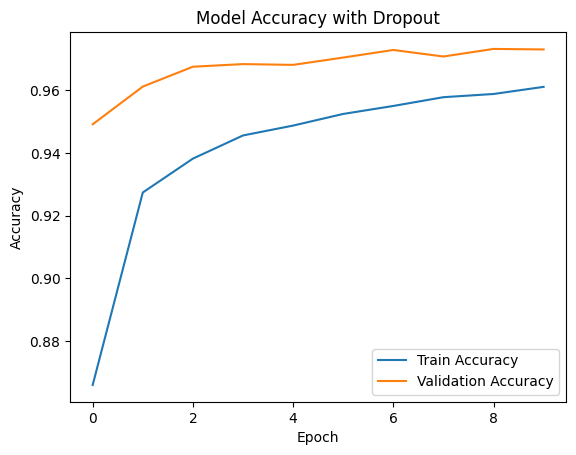

In [ ]:
# Оценка модели
test_loss, test_accuracy = model_with_dropout.evaluate(X_test, y_test)  # Оценка на тестовом наборе
print(f"Test accuracy with Dropout: {test_accuracy:.4f}")

# Визуализация истории обучения
plt.plot(history_with_dropout.history['accuracy'], label='Train Accuracy')  # График точности на обучающем наборе
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation Accuracy')  # График точности на валидационном наборе
plt.title('Model Accuracy with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Функция создания модели с дополнительным слоем
def create_model_with_additional_layer():
    model = keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))  # Первый скрытый слой
    model.add(layers.Dropout(0.5))  # Слой Dropout
    model.add(layers.Dense(64, activation='relu'))  # Второй скрытый слой
    model.add(layers.Dense(32, activation='relu'))  # Новый скрытый слой
    model.add(layers.Dense(10, activation='softmax'))  # Выходной слой

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Компиляция модели
    return model

# Создание и обучение модели с дополнительным слоем
model_with_additional_layer = create_model_with_additional_layer()
history_with_additional_layer = model_with_additional_layer.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)  # Обучение модели

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7510 - loss: 0.7662 - val_accuracy: 0.9464 - val_loss: 0.1774
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9221 - loss: 0.2543 - val_accuracy: 0.9548 - val_loss: 0.1505
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9371 - loss: 0.2053 - val_accuracy: 0.9648 - val_loss: 0.1190
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9426 - loss: 0.1855 - val_accuracy: 0.9658 - val_loss: 0.1201
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9463 - loss: 0.1737 - val_accuracy: 0.9693 - val_loss: 0.1035
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9510 - loss: 0.1522 - val_accuracy: 0.9718 - val_loss: 0.0971
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9541 - loss: 0.1461 - val_accuracy: 0.9691 - val_loss: 0.1030
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9559 - loss: 0.1421 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9670 - loss: 0.1085
Test accuracy with additional layer: 0.9724


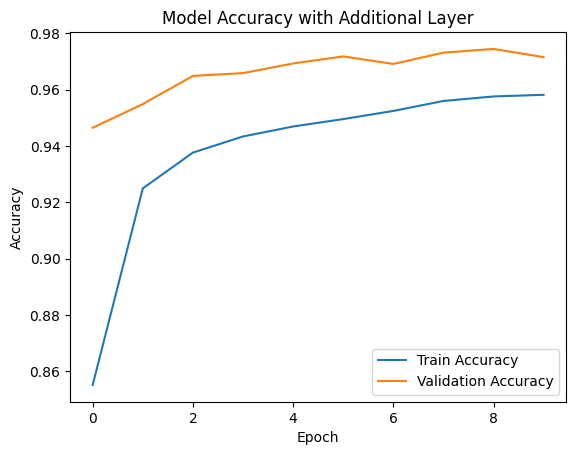

In [ ]:
# Оценка модели
test_loss, test_accuracy = model_with_additional_layer.evaluate(X_test, y_test)  # Оценка на тестовом наборе
print(f"Test accuracy with additional layer: {test_accuracy:.4f}")

# Визуализация истории обучения
plt.plot(history_with_additional_layer.history['accuracy'], label='Train Accuracy')  # График точности на обучающем наборе
plt.plot(history_with_additional_layer.history['val_accuracy'], label='Validation Accuracy')  # График точности на валидационном наборе
plt.title('Model Accuracy with Additional Layer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Задание 3
1. Создайте модель нейронной сети для решения задачи классификации из Лабораторной работы №5, в соответствии с вариантом задания
1. Обучите модель. В завсимости от результатов, видоизмените модель, чтобы попытаться добиться большей точности


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Загрузка набора данных Iris
iris = load_iris()
X = iris.data  # Признаки
y = iris.target  # Метки классов

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Обучение и преобразование
X_test = scaler.transform(X_test)  # Преобразование тестовых данных

In [ ]:
# Функция создания базовой модели
def create_model():
    model = keras.Sequential()
    model.add(layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)))  # Первый скрытый слой
    model.add(layers.Dense(10, activation='relu'))  # Второй скрытый слой
    model.add(layers.Dense(3, activation='softmax'))  # Выходной слой для трех классов Iris
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Компиляция модели
    return model

# Создание и обучение модели
model = create_model()
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=5)  # Обучение модели

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3206 - loss: 1.2343 - val_accuracy: 0.2500 - val_loss: 1.3291
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5262 - loss: 1.1249 - val_accuracy: 0.3333 - val_loss: 1.2265
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5114 - loss: 1.0780 - val_accuracy: 0.3333 - val_loss: 1.1473
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5413 - loss: 0.9933 - val_accuracy: 0.3333 - val_loss: 1.0715
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5137 - loss: 0.9561 - val_accuracy: 0.4167 - val_loss: 1.0096
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5477 - loss: 0.8904 - val_accuracy: 0.5417 - val_loss: 0.9584
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5353 - loss: 0.8538 - val_accuracy: 0.6667 - val_loss: 0.9134
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6080 - loss: 0.7630 - val_accuracy: 0.7083 - val_loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0603
Test accuracy: 1.0000


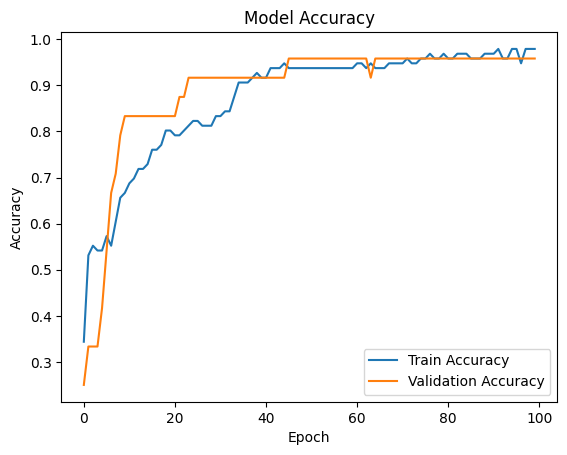

In [ ]:
# Оценка модели
test_loss, test_accuracy = model.evaluate(X_test, y_test)  # Оценка на тестовом наборе
print(f"Test accuracy: {test_accuracy:.4f}")

# Визуализация истории обучения
plt.plot(history.history['accuracy'], label='Train Accuracy')  # График точности на обучающем наборе
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # График точности на валидационном наборе
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Функция создания улучшенной модели
def create_model_improved():
    model = keras.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))  # Первый скрытый слой
    model.add(layers.Dense(32, activation='relu'))  # Второй скрытый слой
    model.add(layers.Dense(16, activation='relu'))  # Новый скрытый слой
    model.add(layers.Dense(3, activation='softmax'))  # Выходной слой
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Компиляция модели
    return model

In [ ]:
# Функция создания модели с Dropout
def create_model_with_dropout():
    model = keras.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))  # Первый скрытый слой
    model.add(layers.Dropout(0.5))  # Слой Dropout для предотвращения переобучения
    model.add(layers.Dense(32, activation='relu'))  # Второй скрытый слой
    model.add(layers.Dense(3, activation='softmax'))  # Выходной слой
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Компиляция модели
    return model

In [ ]:
# Создание и обучение улучшенной модели
improved_model = create_model_with_dropout()
history_improved = improved_model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=5)  # Обучение модели

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3308 - loss: 1.4050 - val_accuracy: 0.5000 - val_loss: 1.1069
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3269 - loss: 1.2306 - val_accuracy: 0.5417 - val_loss: 0.9975
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3931 - loss: 1.0769 - val_accuracy: 0.5833 - val_loss: 0.9056
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4567 - loss: 0.9890 - val_accuracy: 0.7083 - val_loss: 0.8217
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6908 - loss: 0.8383 - val_accuracy: 0.7917 - val_loss: 0.7380
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7423 - loss: 0.7565 - val_accuracy: 0.8333 - val_loss: 0.6622
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7722 - loss: 0.6651 - val_accuracy: 0.9167 - val_loss: 0.5902
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7729 - loss: 0.5677 - val_accuracy: 0.9167 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0468
Test accuracy of improved model: 1.0000


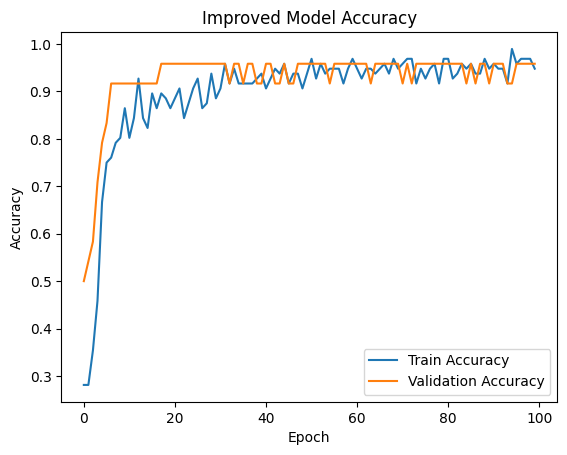

In [ ]:
# Оценка улучшенной модели
test_loss, test_accuracy = improved_model.evaluate(X_test, y_test)  # Оценка на тестовом наборе
print(f"Test accuracy of improved model: {test_accuracy:.4f}")

# Визуализация истории обучения улучшенной модели
plt.plot(history_improved.history['accuracy'], label='Train Accuracy')  # График точности на обучающем наборе
plt.plot(history_improved.history['val_accuracy'], label='Validation Accuracy')  # График точности на валидационном наборе
plt.title('Improved Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()